<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
#| include: false

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Overview

This section provides evaluation schemes for both Numerai Classic and Signals.
The `Evaluator` takes a [`NumerFrame`](https://crowdcent.github.io/numerblox/numerframe.html#numerframe) as input and returns a Pandas DataFrame containing metrics for each given prediction column.

## 0. Base

[`BaseEvaluator`](https://crowdcent.github.io/numerblox/evaluation.html#baseevaluator) implements all the evaluation logic that is common for Numerai Classic and Signals. This includes:
- Mean, Standard Deviation and Sharpe for era returns.
- Max drawdown
- Annual Percentage Yield (APY)
- Correlation with example predictions
- Max [feature exposure](https://forum.numer.ai/t/model-diagnostics-feature-exposure/899)
- [Feature Neutral Mean (FNC)](https://docs.numer.ai/tournament/feature-neutral-correlation), Standard deviation and Sharpe
- [Exposure Dissimilarity](https://forum.numer.ai/t/true-contribution-details/5128/4)
- Mean, Standard Deviation and Sharpe for TB200 (Buy top 200 stocks and sell bottom 200 stocks).
- Mean, Standard Deviation and Sharpe for TB500 (Buy top 500 stocks and sell bottom 500 stocks).

In [1]:
#| echo: false
#| output: asis
show_doc(BaseEvaluator)

---

[source](https://github.com/crowdcent/numerblox/blob/master/numerblox/evaluation.py#L34){target="_blank" style="float:right; font-size:smaller"}

### BaseEvaluator

>      BaseEvaluator (era_col:str='era', fast_mode=False)

Evaluation functionality that is relevant for both
Numerai Classic and Numerai Signals.

:param era_col: Column name pointing to eras. 

Most commonly "era" for Numerai Classic and "friday_date" for Numerai Signals. 

:param fast_mode: Will skip compute intensive metrics if set to True,
namely max_exposure, feature neutral mean, TB200 and TB500.

Note that we calculate the sample standard deviation with ddof=0. 
It may differ slightly from the standard Pandas calculation, but 
is consistent with how NumPy computes standard deviation. 
More info: 
https://stackoverflow.com/questions/24984178/different-std-in-pandas-vs-numpy

## 1. Numerai Classic

[`NumeraiClassicEvaluator`](https://crowdcent.github.io/numerblox/evaluation.html#numeraiclassicevaluator) extends the base evaluation scheme with metrics specific to Numerai Classic.

Additional metrics specific to Numerai are:

- [Feature Neutral Mean v3 (FNCv3)](https://forum.numer.ai/t/true-contribution-details/5128/4), Standard deviation v3 and Sharpe v3.

In [2]:
#| echo: false
#| output: asis
show_doc(NumeraiClassicEvaluator)

---

[source](https://github.com/crowdcent/numerblox/blob/master/numerblox/evaluation.py#L376){target="_blank" style="float:right; font-size:smaller"}

### NumeraiClassicEvaluator

>      NumeraiClassicEvaluator (era_col:str='era', fast_mode=False)

Evaluator for all metrics that are relevant in Numerai Classic.

## 2. Numerai Signals

[`NumeraiSignalsEvaluator`](https://crowdcent.github.io/numerblox/evaluation.html#numeraisignalsevaluator) extends the base evaluation scheme with metrics specific to Numerai Signals.

In [3]:
#| echo: false
#| output: asis
show_doc(NumeraiSignalsEvaluator)

---

[source](https://github.com/crowdcent/numerblox/blob/master/numerblox/evaluation.py#L435){target="_blank" style="float:right; font-size:smaller"}

### NumeraiSignalsEvaluator

>      NumeraiSignalsEvaluator (era_col:str='friday_date', fast_mode=False)

Evaluator for all metrics that are relevant in Numerai Signals.

### Example usage

#### NumeraiClassicEvaluator

We will test [`NumeraiClassicEvaluator`](https://crowdcent.github.io/numerblox/evaluation.html#numeraiclassicevaluator) on version 3 evaluation data with example predictions. The baseline reference (`example_col`) will be random predictions.

In [ ]:
from numerblox.download import NumeraiClassicDownloader

directory = "eval_test_1234321/"
downloader = NumeraiClassicDownloader(directory_path=directory)

In [ ]:
#| eval: false
downloader.download_single_dataset(filename="v4.1/validation.parquet",
                                   dest_path=directory + "validation.parquet")
downloader.download_single_dataset(filename="v4.1/validation_example_preds.parquet",
                                   dest_path=directory + "validation_example_preds.parquet")

No existing directory found at 'eval_test_1234321'. Creating directory...

📁 Downloading 'v4.1/validation.parquet' 📁

2023-01-31 17:36:50,161 INFO numerapi.utils: starting download
eval_test_1234321/validation.parquet: 1.51GB [01:02, 24.2MB/s]                            


📁 Downloading 'v4.1/validation_example_preds.parquet' 📁

2023-01-31 17:37:53,094 INFO numerapi.utils: starting download
eval_test_1234321/validation_example_preds.parquet: 56.9MB [00:02, 27.4MB/s]                            


In [ ]:
#| eval: false
np.random.seed(1234)
test_dataf = create_numerframe(directory + "validation.parquet")
example_preds = pd.read_parquet(directory + "validation_example_preds.parquet")
test_dataf = test_dataf.merge(example_preds, on="id", how="left").reset_index()
test_dataf = test_dataf.sample(10_000)

test_dataf.loc[:, "prediction_random"] = np.random.uniform(size=len(test_dataf))
test_dataf.head(2)

,id,era,data_type,feature_honoured_observational_balaamite,feature_polaroid_vadose_quinze,feature_untidy_withdrawn_bargeman,feature_genuine_kyphotic_trehala,feature_unenthralled_sportful_schoolhouse,feature_divulsive_explanatory_ideologue,feature_ichthyotic_roofed_yeshiva,...,target_george_v4_20,target_george_v4_60,target_william_v4_20,target_william_v4_60,target_arthur_v4_20,target_arthur_v4_60,target_thomas_v4_20,target_thomas_v4_60,prediction,prediction_random
1830220,n4958fe1e51ed7b1,0937,validation,0.5,0.25,0.5,0.0,0.5,0.0,0.50,...,0.5,0.5,0.666667,0.500000,0.500000,0.500000,0.500000,0.333333,0.262811,0.246772
447082,nff20d793aa8db78,0664,validation,0.0,0.00,1.0,0.0,0.0,1.0,0.25,...,0.5,0.5,0.166667,0.166667,0.333333,0.333333,0.333333,0.166667,0.692049,0.385958


The `Evaluator` returns a Pandas DataFrame containing metrics for each prediction column defined.
Note that any column can be used as example prediction. For practical use cases we recommend using proper example predictions (provided by Numerai) instead of random predictions.

#### Fast evaluation

`fast_mode` skips max. feature exposure, feature neutral mean, FNCv3, Exposure Dissimilarity, TB200 and TB500 calculations, which can take a while to compute on full Numerai datasets.

In [ ]:
#| eval: false
evaluator = NumeraiClassicEvaluator(fast_mode=True)
val_stats_fast = evaluator.full_evaluation(
    dataf=test_dataf,
    target_col="target",
    pred_cols=["prediction", "prediction_random"],
    example_col="prediction_random",
)
val_stats_fast

Using 'v4.1/features.json/medium' feature set to calculate FNC metrics.


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

,target,mean,std,sharpe,max_drawdown,apy,corr_with_example_preds
prediction,target,0.050420,0.235582,0.214023,-0.998109,155.074861,0.007460
prediction_random,target,-0.006162,0.233542,-0.026385,-1.000000,-62.819089,0.981837


#### Plot correlations

The `plot_correlations` method will use matplotlib to plot per era correlation scores over time. The plots default to a rolling window of 20 eras in order to best align with repuation scores as measured on the Numerai leaderboards. 

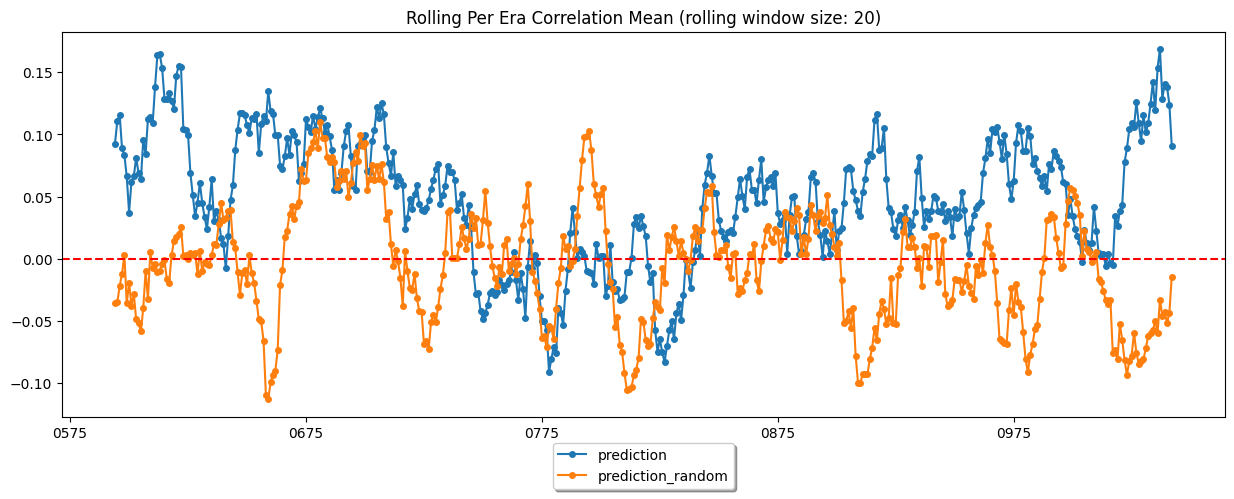

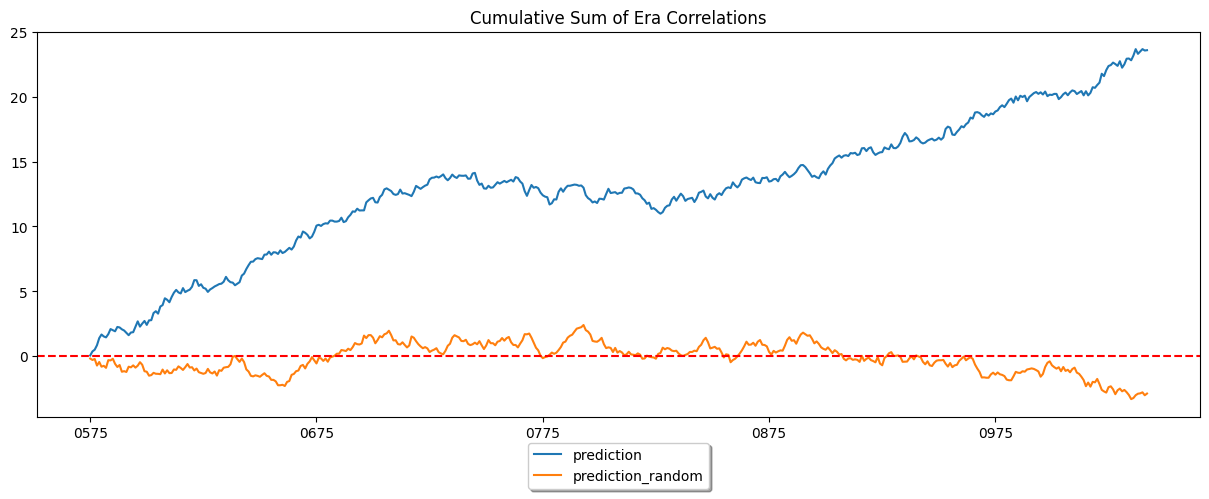

In [ ]:
#| eval: false
evaluator.plot_correlations(
    test_dataf, pred_cols=["prediction", "prediction_random"], roll_mean=20
)

In [ ]:
# Clean up environment
downloader.remove_base_directory()

⚠ Deleting directory for 'NumeraiClassicDownloader' ⚠
Path: '/home/clepelaars/numerblox/nbs/eval_test_1234321'

--------------------------------------------------